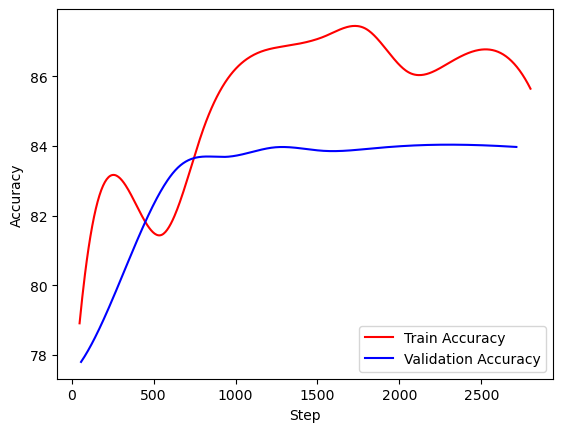

In [8]:
import numpy as np
from src.utils.constants import Paths
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d


metric = 'acc'
version = '18'
metrics = {'loss': 'Loss', 'acc': 'Accuracy'}
train_data = pd.read_csv(Paths.STATISTICS_CSV.format(version, 'train', metric))
val_data = pd.read_csv(Paths.STATISTICS_CSV.format(version, 'val', metric))

multiplier = 1 if metric == 'loss' else 100
x = train_data['Step'].to_numpy()[::5] 
y = train_data['Value'].to_numpy()[::5] * multiplier

x_val = val_data['Step'].to_numpy()[::5] 
y_val = val_data['Value'].to_numpy()[::5] * multiplier

cubic_interpolation_model = interp1d(x, y, kind = "cubic")
cubic_interpolation_model_val = interp1d(x_val, y_val, kind = "cubic")
 
# Plotting the Graph
X_=np.linspace(x.min(), x.max(), 500)
Y_=cubic_interpolation_model(X_)

X_val_=np.linspace(x_val.min(), x_val.max(), 500)
Y_val_=cubic_interpolation_model_val(X_val_)
 
plt.plot(X_, Y_, color = "red", label = f"Train {metrics[metric]}")
plt.plot(X_val_, Y_val_, color = "blue", label = f"Validation {metrics[metric]}")

plt.title("")
plt.xlabel("Step")
plt.ylabel(f"{metrics[metric]}")
plt.legend()
plt.show()

In [6]:
import torch
from src.models.discriminator import Discriminator
from src.models.generator import Generator
from torchviz import make_dot
from src.utils.constants import Paths

z_dim = 128
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')
num_classes = len(classes)
generator_input_dim = z_dim + num_classes
input_channels = 1
discriminator_input_dim = input_channels + num_classes

generator = Generator(generator_input_dim, input_channels)
discriminator = Discriminator(discriminator_input_dim)

x = torch.randn(1, generator_input_dim)
y = torch.randn(1, discriminator_input_dim)

yhat = generator(x)



ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH